In [43]:
#importing dependencies here
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import glob

In [2]:
# reading the digits dataset from sklearn
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
digits.data.shape

(1797, 64)

In [5]:
# labels corresponding to the images
digits.target.shape

(1797,)

In [85]:
# digits.images

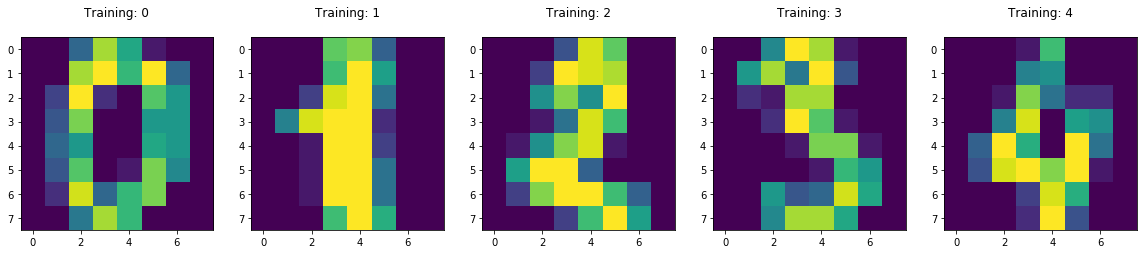

In [6]:
# displaying images and corresponding labels from the digits dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)))
    plt.title("Training: %i\n" %label)

### Splitting the data into training and test data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [9]:
len(X_train)

1257

In [10]:
len(X_test)

540

### Implementing Logistics Regression for Digits Dataset

In [31]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver="newton-cg", max_iter=1000)
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Evaluation

In [33]:
lm.score(X_test, y_test)

0.9629629629629629

In [34]:
predictions = lm.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(y_test, predictions)

Text(69.0, 0.5, 'Truth')

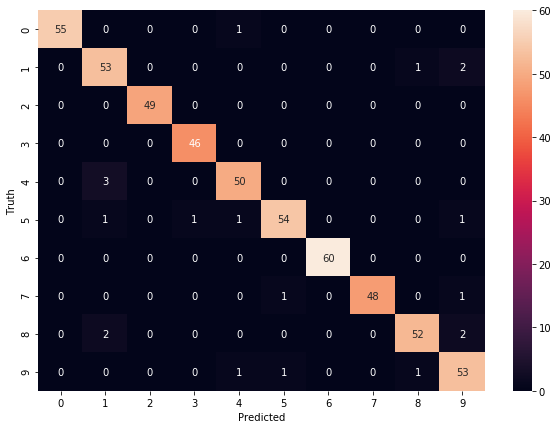

In [37]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.90      0.95      0.92        56
           2       1.00      1.00      1.00        49
           3       0.98      1.00      0.99        46
           4       0.94      0.94      0.94        53
           5       0.96      0.93      0.95        58
           6       1.00      1.00      1.00        60
           7       1.00      0.96      0.98        50
           8       0.96      0.93      0.95        56
           9       0.90      0.95      0.92        56

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

